# Installation of Causal Learn Library

In [1]:
!pip install causal-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.9/172.9 KB 3.1 MB/s eta 0:00:00


# Raw Data Loading and Truth Graph for SACHS dataset

In [2]:
import numpy as np
SACHS_DATA="https://raw.githubusercontent.com/ElementAI/causal_discovery_toolbox/master/cdt/data/resources/cyto_full_data.csv"

data = np.loadtxt(SACHS_DATA, skiprows=1,delimiter=',')

# Exploratory Data Analysis

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_data.csv' with your actual file)
sachs_df = pd.read_csv(SACHS_DATA)

# Display the summary statistics in a pretty way
summary_stats = sachs_df.describe()
styled_summary_stats = summary_stats.style.format("{:.2f}").set_caption("Summary Statistics")
display(styled_summary_stats)



,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
count,7466.00,7466.00,7466.00,7466.00,7466.00,7466.00,7466.00,7466.00,7466.00,7466.00,7466.00
mean,124.07,145.38,54.85,151.12,27.03,26.63,81.17,625.76,30.34,135.01,73.27
std,247.53,377.06,173.86,299.35,43.05,45.83,137.77,644.46,92.87,494.77,215.66
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,30.80,16.50,9.41,18.30,9.56,8.51,23.30,276.00,4.46,19.30,8.01
50%,53.80,26.70,16.50,52.80,17.80,17.20,37.20,449.00,12.70,30.50,18.40
75%,103.00,64.40,27.10,172.00,32.80,32.20,72.30,750.00,23.50,49.60,52.80
max,4614.00,7105.00,6208.00,9058.00,1275.00,2571.00,3555.00,8896.00,1611.00,7499.00,4740.00


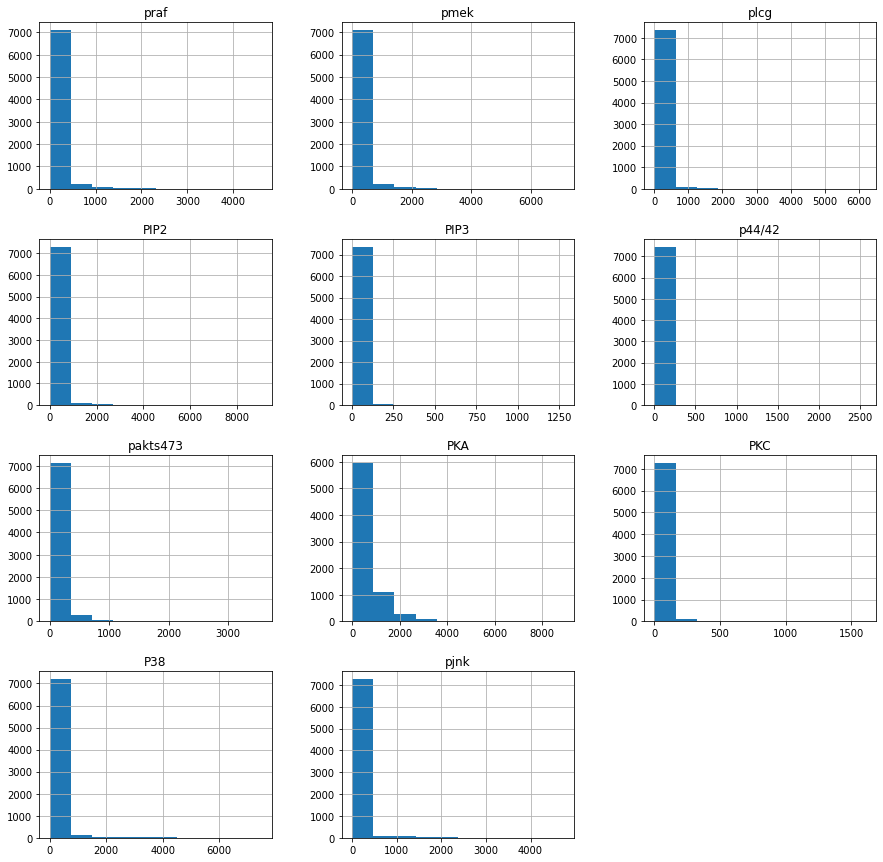

In [6]:
# Plot histograms for each variable
sachs_df.hist(figsize=(15, 15))
plt.show()



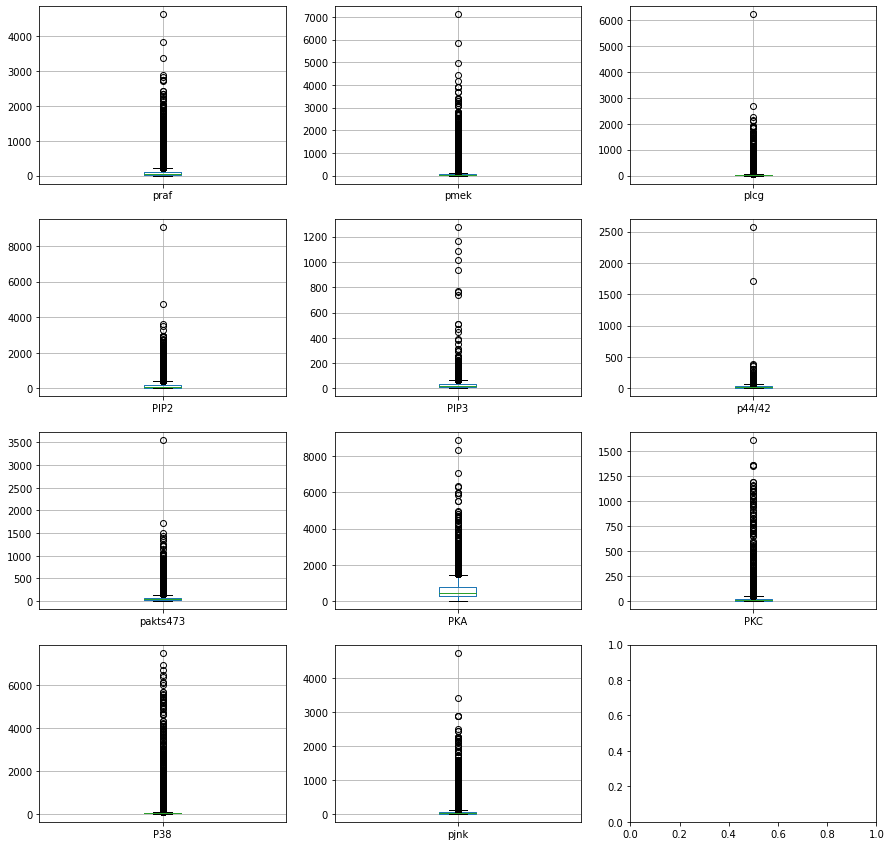

In [7]:
# Plot boxplots for each variable
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for i, column in enumerate(sachs_df.columns):
    sachs_df.boxplot(column=column, ax=axes[i // 3, i % 3])
plt.show()



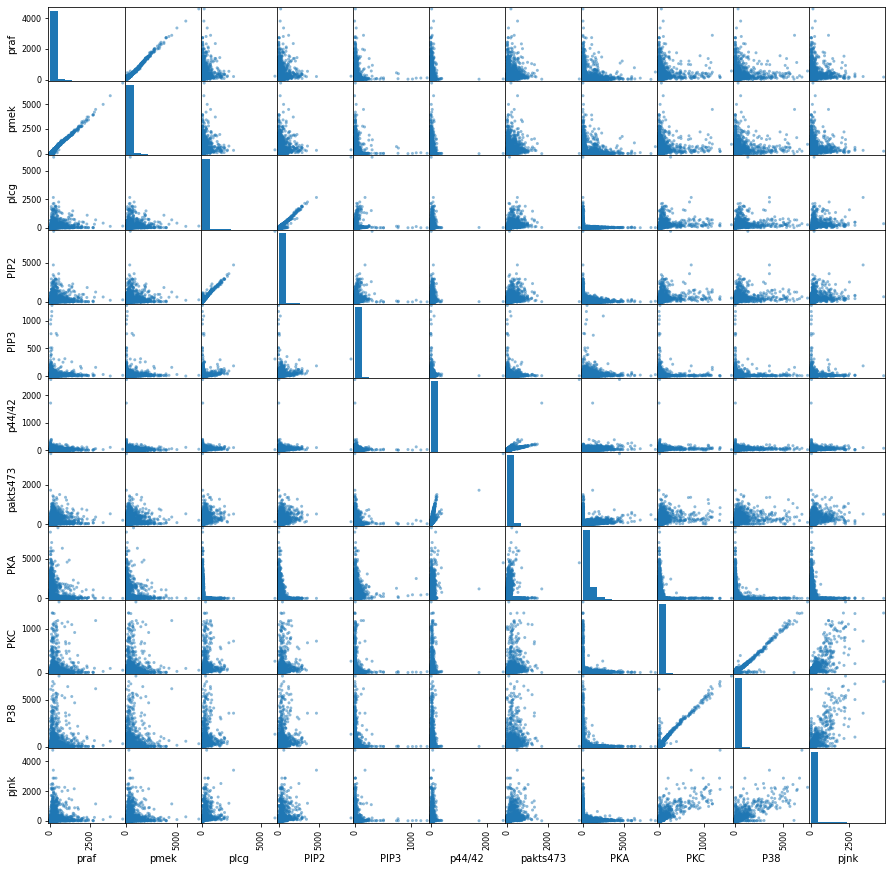

In [8]:
# Plot individual scatter plots between each pair of variables
pd.plotting.scatter_matrix(sachs_df, figsize=(15, 15), diagonal='hist')
plt.show() 

In [4]:
label_mapping = {
    '0': 'praf',
    '1': 'pmek',
    '2': 'plcg',
    '3': 'PIP2',
    '4': 'PIP3',
    '5': 'p44/42',
    '6': 'pakts473',
    '7': 'PKA',
    '8': 'PKC',
    '9': 'P38',
    '10': 'pjnk'
}

In [5]:
# create a text file
with open("sachs.txt", "w") as file:
    file.write("Graph Nodes:\n praf;pmek;plcg;PIP2;PIP3;p44/42;pakts473;PKA;PKC;P38;pjnk \n Graph Edges: \n1. PIP2 --> PKC\n2. plcg --> PIP2\n3. PIP3 --> plcg\n4. PIP2 --> PIP3\n5. plcg --> PKC\n6. PKC --> pjnk\n7. PKC --> P38\n8. PKA --> P38\n9. PKC --> praf\n10. PKA --> praf\n11. praf --> pmek\n12. pmek --> p44/42\n13. PKC --> pmek\n14. PKA --> pakts473\n15. PIP3 --> pakts473\n16. PKA --> pmek\n17. PKA --> p44/42\n18. PKA --> pjnk\n")

# print the contents of the text file
with open("sachs.txt", "r") as file:
    print(file.read())

Graph Nodes:
 praf;pmek;plcg;PIP2;PIP3;p44/42;pakts473;PKA;PKC;P38;pjnk 
 Graph Edges: 
1. PIP2 --> PKC
2. plcg --> PIP2
3. PIP3 --> plcg
4. PIP2 --> PIP3
5. plcg --> PKC
6. PKC --> pjnk
7. PKC --> P38
8. PKA --> P38
9. PKC --> praf
10. PKA --> praf
11. praf --> pmek
12. pmek --> p44/42
13. PKC --> pmek
14. PKA --> pakts473
15. PIP3 --> pakts473
16. PKA --> pmek
17. PKA --> p44/42
18. PKA --> pjnk



In [6]:
def update_node_labels(graph, label_mapping):
    for node in graph.get_nodes():
        node_name = node.get_name()
        if node_name in label_mapping:
            node.set_label(label_mapping[node_name])


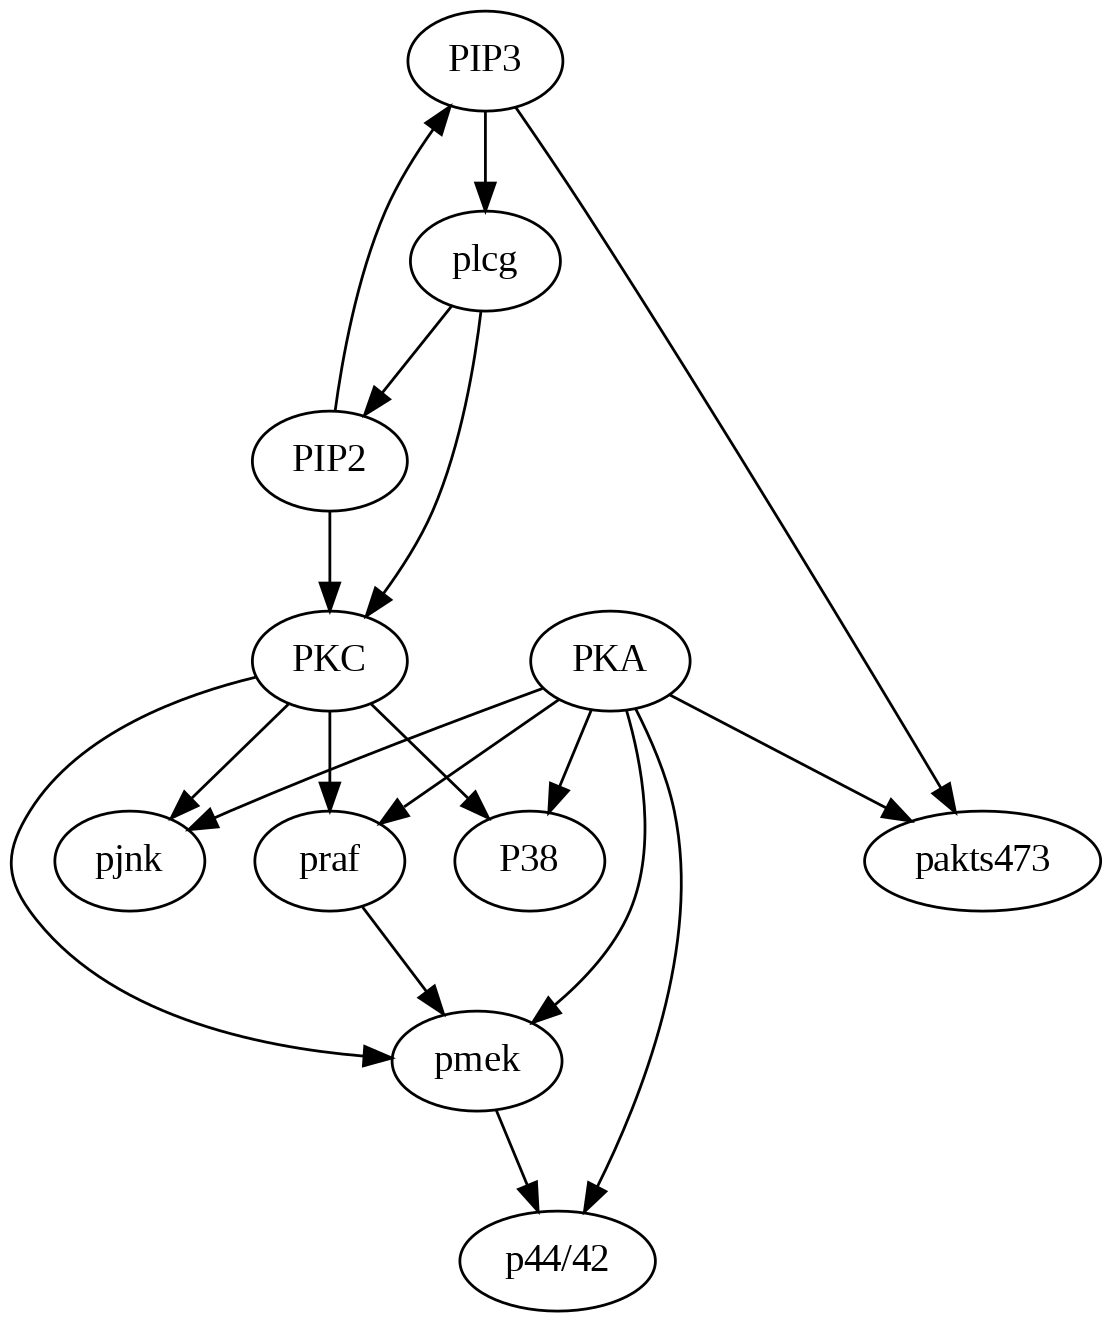

In [7]:
from causallearn.utils.TXT2GeneralGraph import txt2generalgraph
from causallearn.utils.GraphUtils import GraphUtils
from IPython.display import Image, display


truth_sachs_dag = txt2generalgraph('sachs.txt')
# convert to pydot
graphviz_pag = GraphUtils.to_pydot(truth_sachs_dag)
# change the node labels
update_node_labels(graphviz_pag,label_mapping)
# tp png format 
graphviz_pag.write_png('original_dag.png')
display(Image('original_dag.png'))

# Constraint-based Methods

## PC Algorithm

  0%|          | 0/11 [00:00<?, ?it/s]

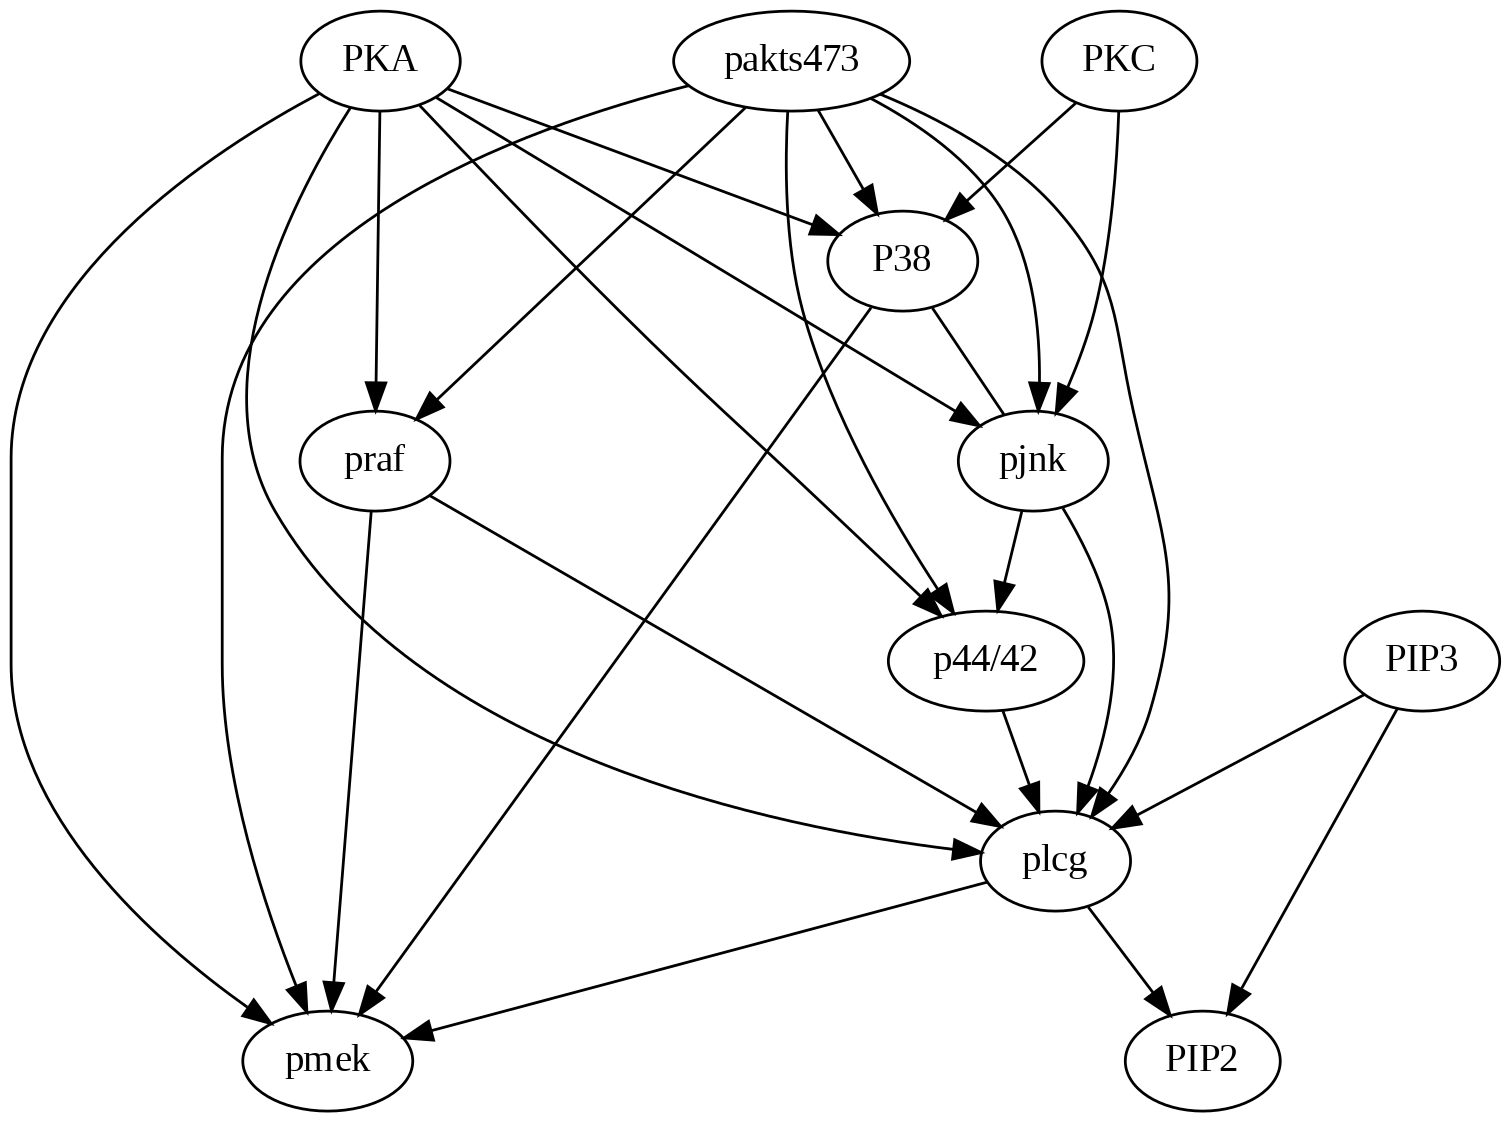

In [9]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from IPython.display import Image


# default parameters
cg = pc(data)

pd_pc_graph = GraphUtils.to_pydot(cg.G)
# change the node labels
update_node_labels(pd_pc_graph,label_mapping)
# visualization using pydot
img = Image(pd_pc_graph.create_png())
display(img)

## FCI Algorithm

  0%|          | 0/11 [00:00<?, ?it/s]

X3 --> X4
X7 --> X11


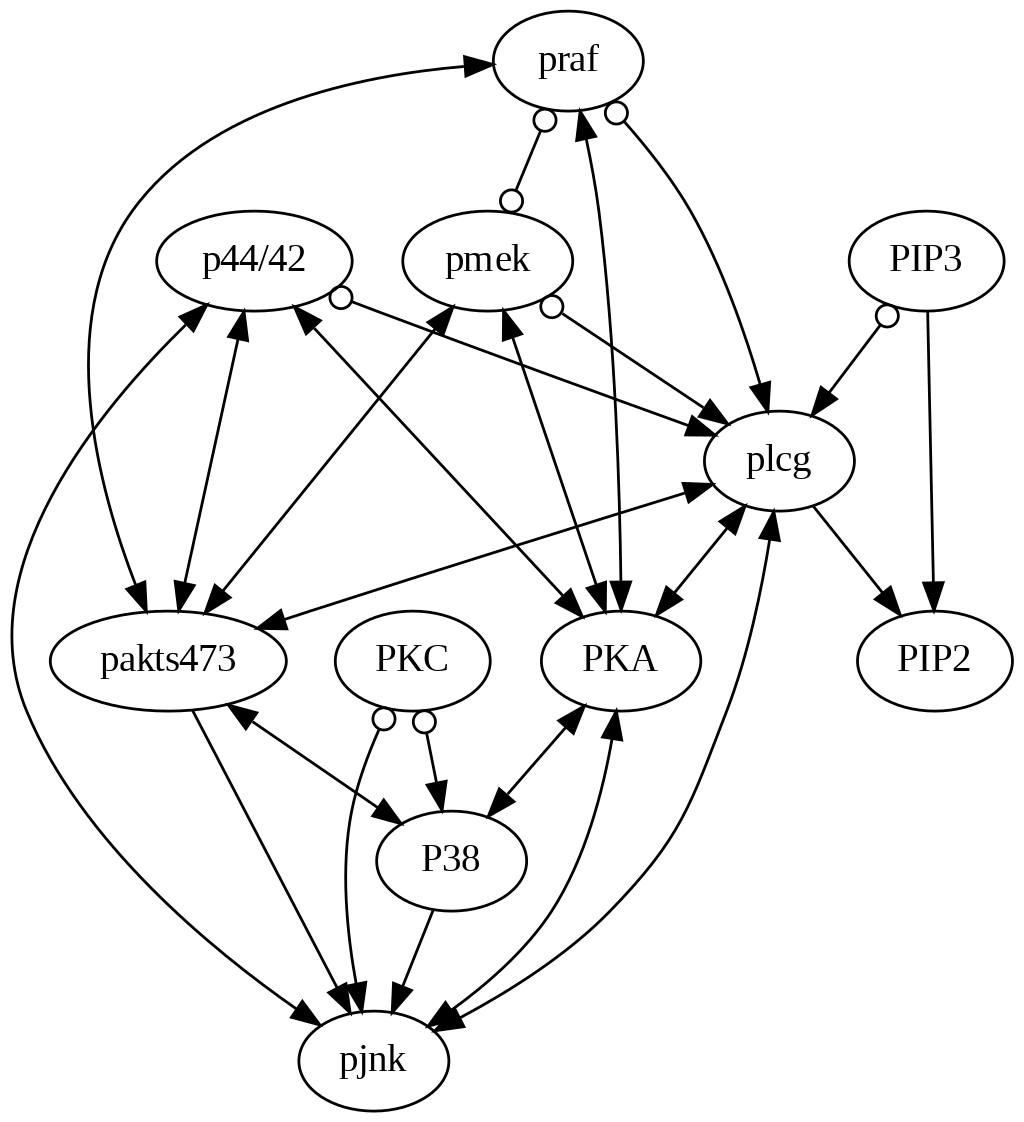

In [10]:
from causallearn.search.ConstraintBased.FCI import fci
import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# default parameters
G, edges = fci(data)

fci_graph = GraphUtils.to_pydot(G)
# change the node labels
update_node_labels(fci_graph,label_mapping)
# visualization using pydot
img = Image(fci_graph.create_png())
display(img)

# Score Based Algorithm

## GES Algorithm

[[ 0 -1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
[[ 0 -1  0  0  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
[[ 0 -1  0  0  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 

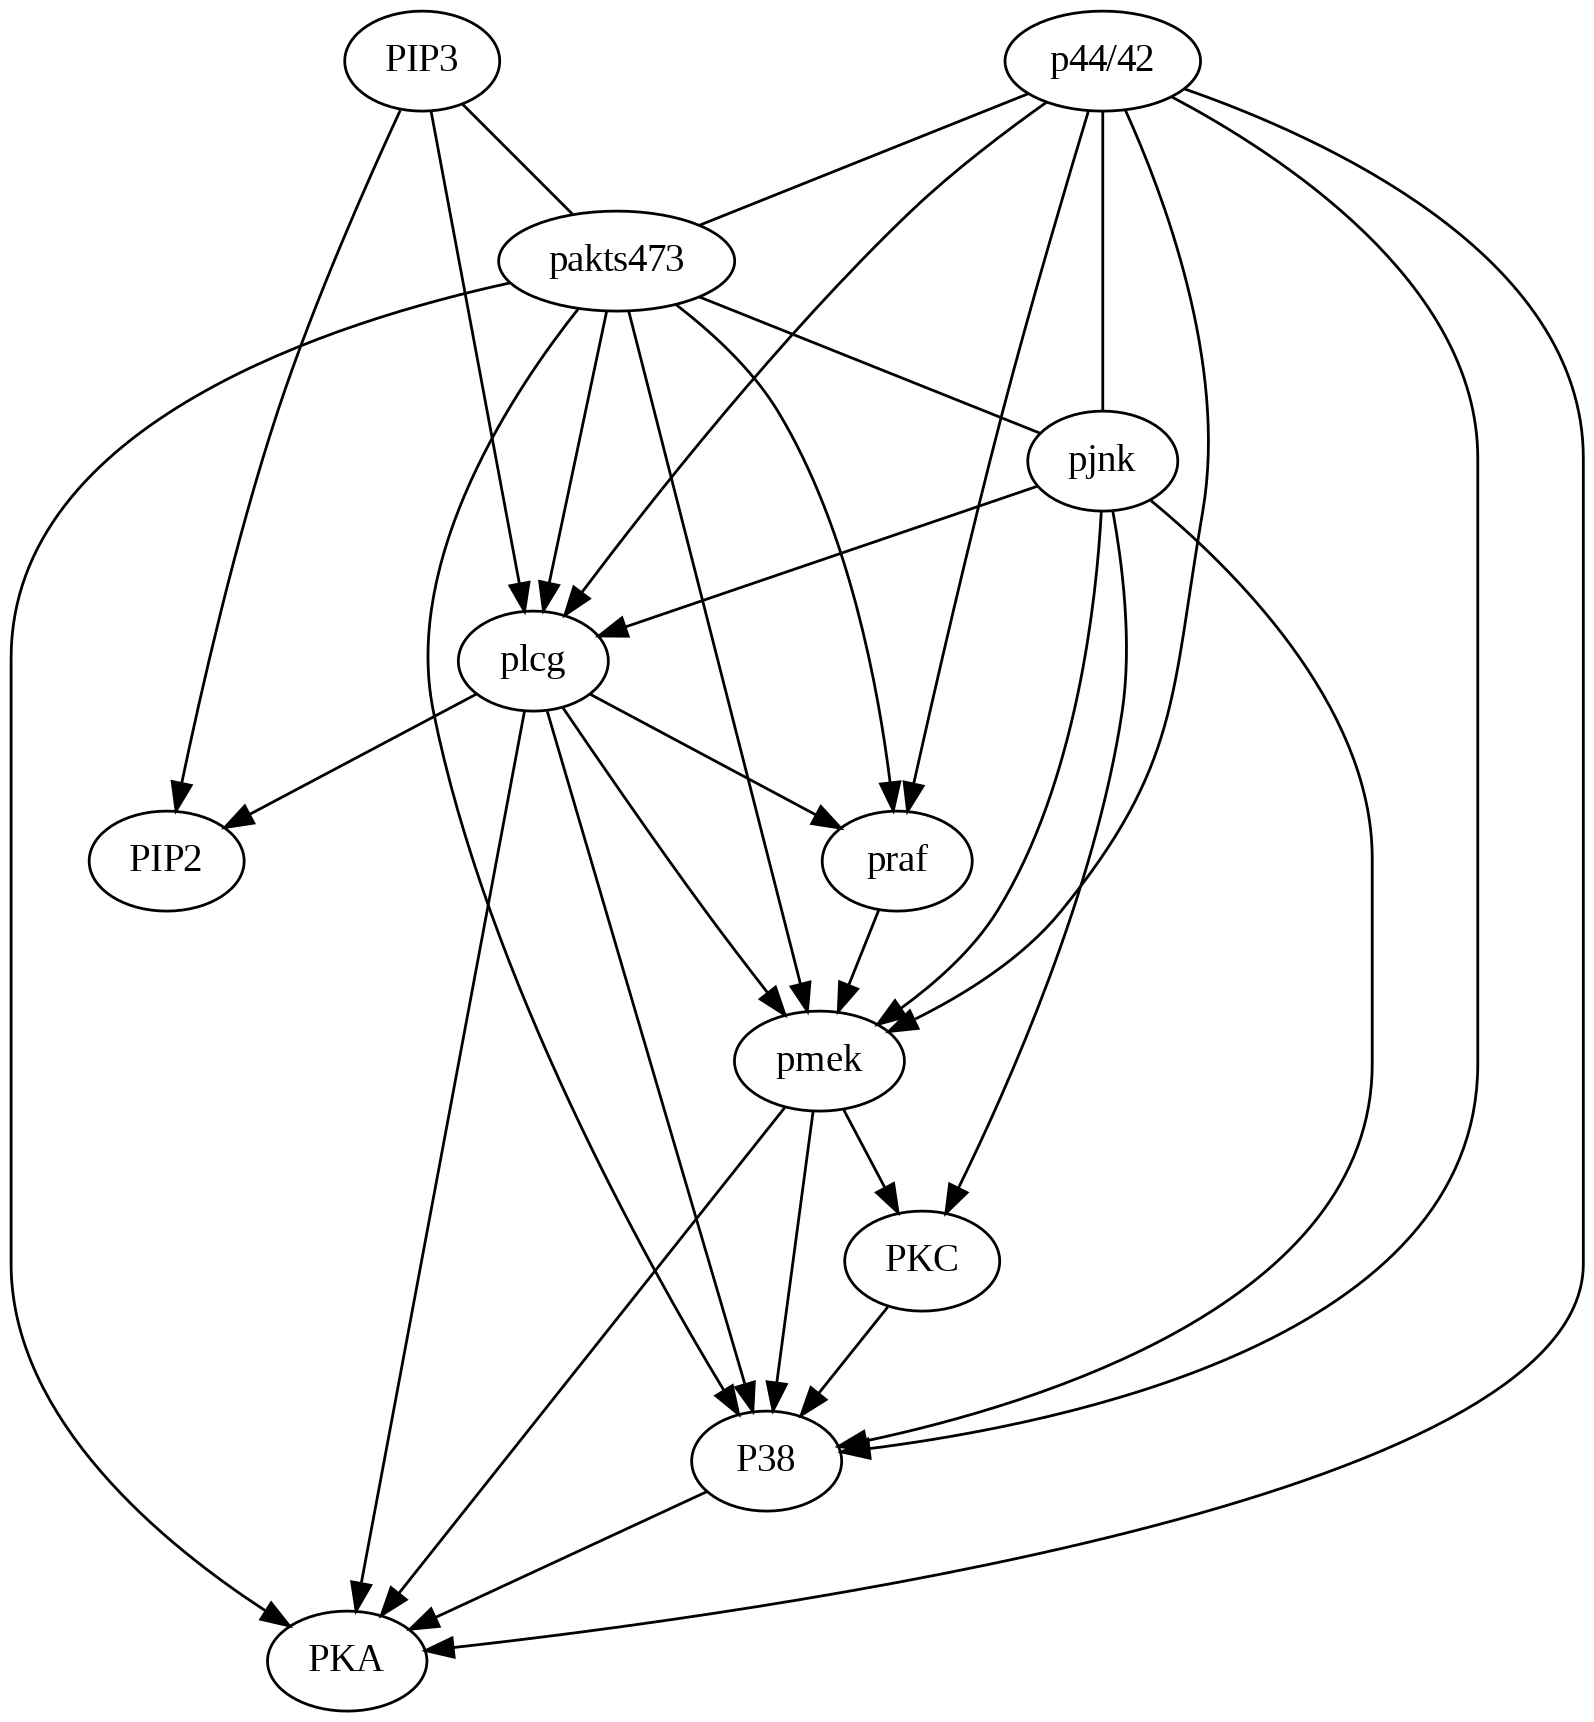

In [11]:
from causallearn.search.ScoreBased.GES import ges
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

# default parameters
ges_graph = ges(data)

# Visualization using pydot
ges_pydot = GraphUtils.to_pydot(ges_graph['G'])
# change the node labels
update_node_labels(ges_pydot,label_mapping)

# visualization using pydot
img = Image(ges_pydot.create_png())
display(img)

# Semi Parameteric Algorithms

## Linear Non-Gaussian Noise (LiNGAM)

<ipython-input-12-19f084f07b07>:11: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which hasknown issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  pd_lingam_graph = nx.drawing.nx_pydot.to_pydot(dag)


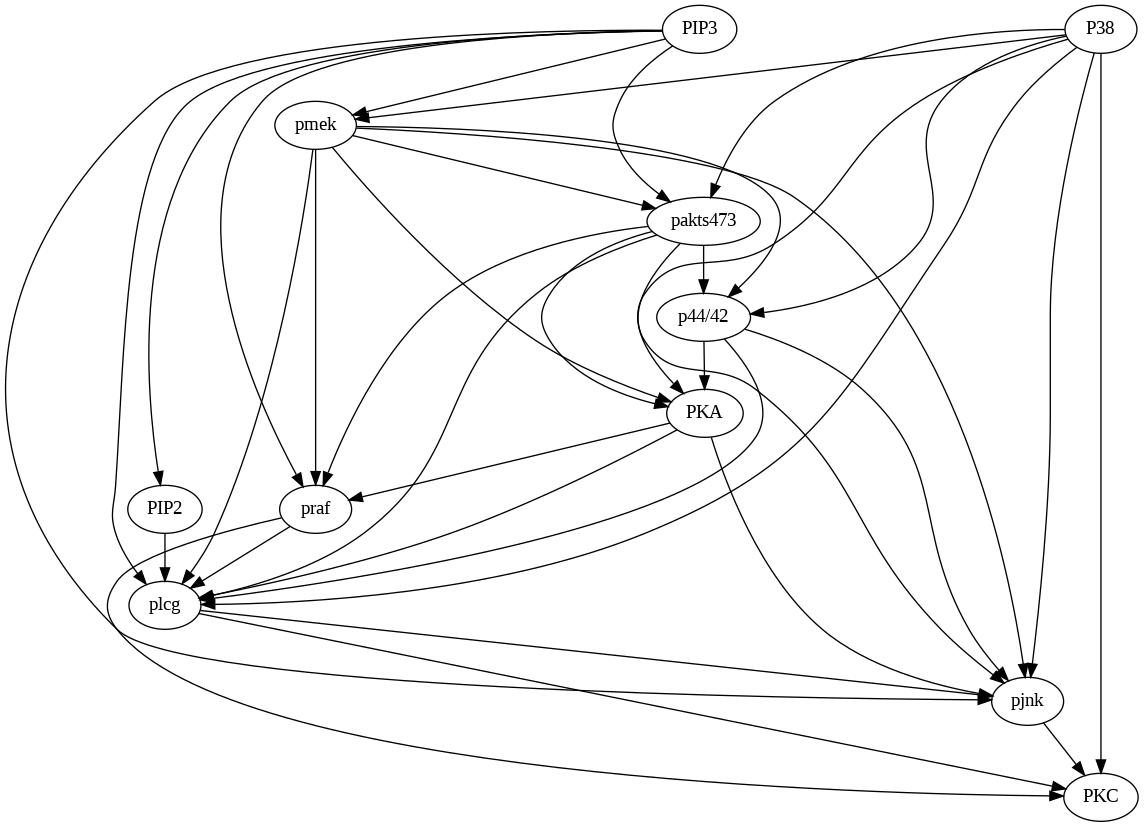

In [12]:
from causallearn.search.FCMBased import lingam
import networkx as nx
import matplotlib.pyplot as plt

model = lingam.DirectLiNGAM()
model.fit(data)

# create DAG using NetworkX
dag = nx.DiGraph(model.adjacency_matrix_)

pd_lingam_graph = nx.drawing.nx_pydot.to_pydot(dag)

# update the node labels
update_node_labels(pd_lingam_graph, label_mapping)

# visualization using pydot
img = Image(pd_lingam_graph.create_png())
display(img)
